<a href="https://colab.research.google.com/github/annagaspareto/desafio04-DNC/blob/main/RID144156_Desafio04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 01) Análise Descritiva

In [ ]:
import pandas as pd
import io
from google.colab import files


uploaded = files.upload()

Saving MKT.csv to MKT.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['MKT.csv']))

In [ ]:
# Visualizando as primeiras linhas do dataset
print(df.head())

   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88


In [ ]:
# Verificando informações gerais do dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB
None


In [ ]:
# Verificando valores ausentes
print(df.isnull().sum())

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64


In [ ]:
# Verificando dados duplicados
print(df.duplicated().sum())

0


In [ ]:
# Estatísticas descritivas
print(df.describe())

          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.980000   43.680000   50.880000   20.820000
max    355.680000   59.520000  121.080000   32.400000


# Etapa 02) Análise Exploratória

In [ ]:
!pip install pypalettes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.0/366.0 kB 8.4 MB/s eta 0:00:00


In [ ]:
from pypalettes import load_cmap
cmap = load_cmap("Arches2")

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


In [ ]:
print(df.columns)

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')


<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen

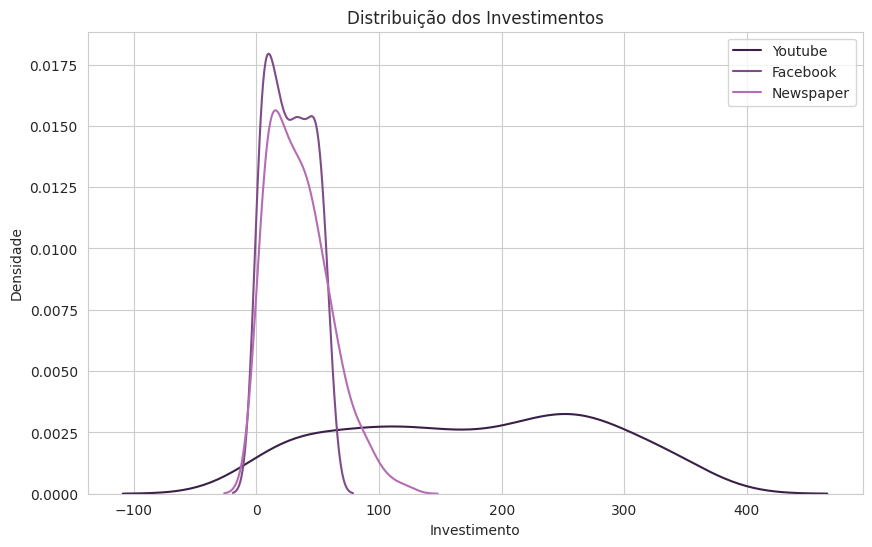

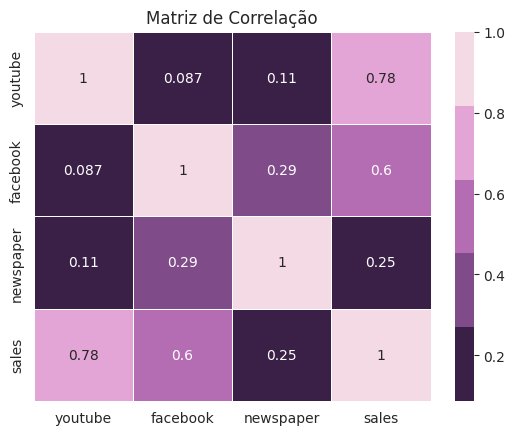

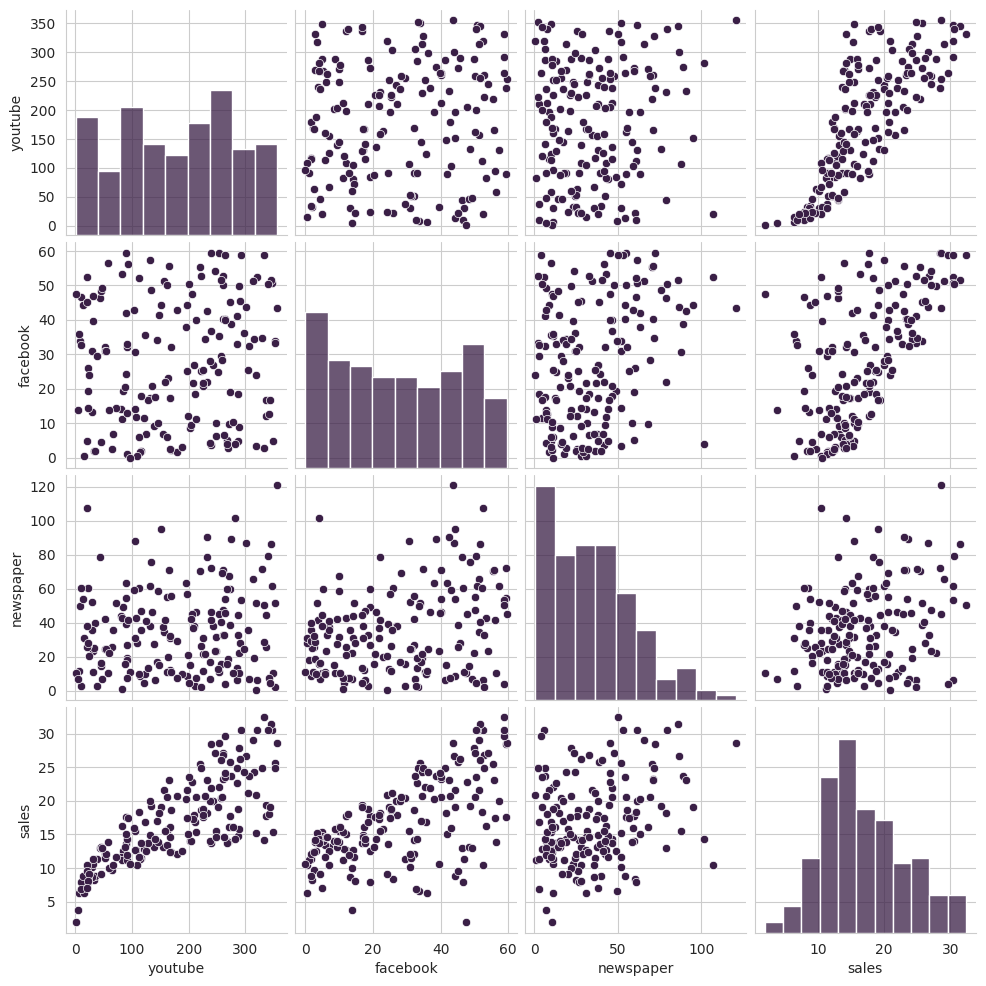

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pypalettes import load_cmap

cmap = load_cmap('Arches2')
sns.set_style('whitegrid')

# Gráfico Histograma
plt.figure(figsize=(10, 6))
sns.kdeplot(df['youtube'], color=cmap.colors[0], label='Youtube')
sns.kdeplot(df['facebook'], color=cmap.colors[1], label='Facebook')
sns.kdeplot(df['newspaper'], color=cmap.colors[2], label='Newspaper')

plt.title('Distribuição dos Investimentos')
plt.xlabel('Investimento')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# Matriz Correção
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

# Gráficos de dispersão
sns.set_palette(cmap.colors)
sns.pairplot(df)
plt.show()

# Etapa 03) Modelagem

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Definindo as variáveis independentes (X) e dependente (y)
X = df[['facebook', 'youtube', 'newspaper']]
y = df['sales']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

# Calculando o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)

# Calculando o Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Obtendo os coeficientes do modelo
coef = model.coef_

# Obtendo o intercepto do modelo
intercept = model.intercept_

# Exibindo os resultados
print(f'R²: {r2}')
print(f'MSE: {mse}')
print("Coeficientes:", coef)
print("Intercepto:", intercept)

R²: 0.872863085701216
MSE: 5.5767902340267135
Coeficientes: [ 1.94481975e-01  4.41858407e-02 -4.88341093e-05]
Intercepto: 3.703049890164605


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Definindo as variáveis independentes (X) e dependente (y)
X = df[['facebook', 'youtube']] # O resultado da newspaper não altera os dados, por isso deixei de fora
y = df['sales']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)

# Calculando o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)

# Calculando o Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Obtendo os coeficientes do modelo
coef = model.coef_

# Obtendo o intercepto do modelo
intercept = model.intercept_

# Exibindo os resultados
print(f'R²: {r2}')
print(f'MSE: {mse}')
print("Coeficientes:", coef)
print("Intercepto:", intercept)

R²: 0.8728894133434413
MSE: 5.575635386602132
Coeficientes: [0.19446447 0.04418508]
Intercepto: 3.7019666216006435


# Etapa 04) Calculando predição

In [ ]:
import pandas as pd

# Definindo novos valores de investimento em facebook e youtube
investimentos = pd.DataFrame({
    'facebook': [150, 200, 250, 300, 350],
    'youtube': [50, 100, 150, 200, 250]
})

# Fazendo as previsões com o modelo treinado
vendas_previstas = model.predict(investimentos)

# Adicionando as previsões ao DataFrame de novos investimentos
investimentos['vendas_previstas'] = vendas_previstas

# Resultado
print("Previsões de Vendas com Base nos Investimentos:")
print(investimentos)

Previsões de Vendas com Base nos Investimentos:
   facebook  youtube  vendas_previstas
0       150       50         35.080891
1       200      100         47.013368
2       250      150         58.945845
3       300      200         70.878323
4       350      250         82.810800


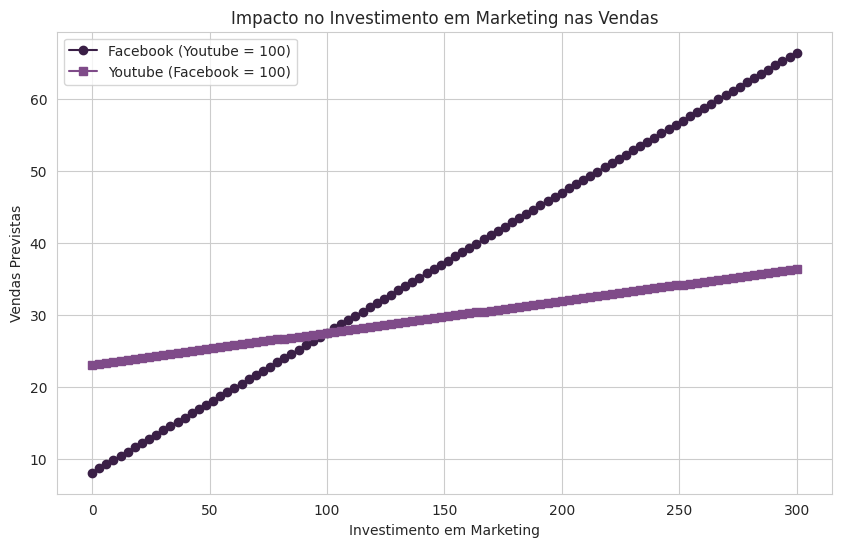

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Correção
# Definir valores de investimento para análise individual
investimentos_facebook = np.linspace(0, 300, 100)
investimentos_youtube = np.linspace(0, 300, 100)

# Criar DataFrames para análise individual
# 1 - Impacto do facebook (youtube constante)
df_facebook = pd.DataFrame({
    'facebook': investimentos_facebook,
    'youtube': 100
})

# 2 - Impacto do youtube (facebook constante)
df_youtube = pd.DataFrame({
    'facebook': 100,
    'youtube': investimentos_youtube
})

# Fazer as previsões com o modelo treinado
# 1 - Impacto do facebook
df_facebook['vendas_previstas'] = model.predict(df_facebook)

# 2 - Impacto do youtube
df_youtube['vendas_previstas'] = model.predict(df_youtube)

# Visualização dos Dados
plt.figure(figsize=(10, 6))
plt.plot(df_facebook['facebook'], df_facebook['vendas_previstas'], marker='o', label='Facebook (Youtube = 100)')
plt.plot(df_youtube['youtube'], df_youtube['vendas_previstas'], marker='s', label='Youtube (Facebook = 100)')
plt.xlabel('Investimento em Marketing')
plt.ylabel('Vendas Previstas')
plt.title('Impacto no Investimento em Marketing nas Vendas')
plt.legend()
plt.grid(True)
plt.show()

# **Conclusão:**
Após analisar os resultados do modelo de regressão linear e o gráfico de impacto individual, cheguei à conclusão de que o investimento em facebook é mais vantajoso para aumentar as vendas do que o investimento em youtube. Aqui estão os pontos principais que justificam essa conclusão:

### Impacto nas Vendas:
*   O coeficiente de facebook (0.1945) é bem maior do que o de youtube (0.0442).
*   Isso significa que, para cada 1 unidade monetária investida em facebook, as vendas aumentam em 0.1 enquanto o mesmo investimento em youtube resulta em um aumento de apenas 0.0442 unidades.

### Eficiência do Investimento:
O gráfico mostra claramente que, para o mesmo valor de investimento, o facebook gera um crescimento muito maior nas vendas em comparação com o youtube.

**Por exemplo, com um investimento de 100 unidades:**
*   O facebook gera um aumento de 19.45 unidades nas vendas.
*   O youtube gera um aumento de apenas 4.42 unidades nas vendas.

### Relação Custo-Benefício:
O retorno sobre o investimento (ROI) é maior no facebook do que no youtube.

Isso faz do facebook uma opção mais custo-efetiva para impulsionar as vendas.

### Recomendação:
* Dada a eficácia comprovada do facebook, recomendo priorizar o investimento nessa plataforma.
* O youtube pode ser utilizado como um complemento, mas com um orçamento menor, já que seu impacto nas vendas é consideravelmente menor.

### Recomendação Estratégica:
**Facebook:**
* Aumentar o investimento em campanhas no facebook, pois ele oferece o maior retorno em termos de vendas.
* Focar em anúncios segmentados para maximizar o impacto.

**Youtube:**
* Manter ou reduzir o investimento em youtube, utilizando-o principalmente para branding e alcance de audiência, já que seu impacto direto nas vendas é limitado.

## Considerações Finais:
Embora o youtube tenha seu valor em estratégias de marketing, os dados mostram que o facebook é a plataforma mais eficaz para aumentar as vendas diretamente. Portanto, a alocação do orçamento de marketing deve ser priorizada para o facebook, enquanto o youtube pode ser usado de forma complementar para alcançar objetivos secundários, como conscientização da marca e engajamento.